### Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [2]:
train_labels = []
train_samples = []

Example data: 

- An experimental drug was tested on individuals from ages 13 to 100 in a clinical trial
- The trial had 2100 pariticipants. Half were under 65 years old, half were 65 years or older
- Around 95% of patients 65 or older experienced side effects
- Around 95% of patients under 65 experienced no side effects

In [3]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)


In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [6]:
scaled_train_samples[:5]

array([[0.16091954],
       [0.66666667],
       [0.20689655],
       [0.        ],
       [0.08045977]])

### Simple `tf.keras` Sequential Model

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [8]:
model = Sequential([
    Dense(units=16, input_shape=(1, ), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax') # Output layer
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [11]:
# Training is started when call the fit function
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 1s - loss: 0.7006 - accuracy: 0.4500
Epoch 2/30
210/210 - 0s - loss: 0.6698 - accuracy: 0.6905
Epoch 3/30
210/210 - 0s - loss: 0.6221 - accuracy: 0.8252
Epoch 4/30
210/210 - 0s - loss: 0.5792 - accuracy: 0.8481
Epoch 5/30
210/210 - 0s - loss: 0.5410 - accuracy: 0.8529
Epoch 6/30
210/210 - 0s - loss: 0.5052 - accuracy: 0.8667
Epoch 7/30
210/210 - 0s - loss: 0.4722 - accuracy: 0.8671
Epoch 8/30
210/210 - 0s - loss: 0.4425 - accuracy: 0.8795
Epoch 9/30
210/210 - 0s - loss: 0.4161 - accuracy: 0.8886
Epoch 10/30
210/210 - 0s - loss: 0.3927 - accuracy: 0.8952
Epoch 11/30
210/210 - 0s - loss: 0.3727 - accuracy: 0.9014
Epoch 12/30
210/210 - 0s - loss: 0.3551 - accuracy: 0.9110
Epoch 13/30
210/210 - 0s - loss: 0.3406 - accuracy: 0.9119
Epoch 14/30
210/210 - 0s - loss: 0.3282 - accuracy: 0.9114
Epoch 15/30
210/210 - 0s - loss: 0.3175 - accuracy: 0.9162
Epoch 16/30
210/210 - 0s - loss: 0.3083 - accuracy: 0.9138
Epoch 17/30
210/210 - 0s - loss: 0.3008 - accuracy: 0.9219
Epoch 

### Creating Validation sets using Keras
There are two ways in which we can create create validation sets while using `.fit()` function.
- We can pass in a value for parameter `validation_data`
- We can pass in a value for parameter `validation_split`

Note: If we are using a validation set, it is important to have the data shuffled before it is passed to `fit`

In [12]:
# We create a validation set on the go
model.fit(scaled_train_samples, train_labels, validation_split=0.1 ,batch_size=10, epochs=30, shuffle=True, verbose=2)
# It splits out a portion of training set to the validation set
# Here, 10% of the training data is used for the creation of a validation set

Epoch 1/30
189/189 - 0s - loss: 0.2574 - accuracy: 0.9302 - val_loss: 0.2779 - val_accuracy: 0.9429
Epoch 2/30
189/189 - 0s - loss: 0.2562 - accuracy: 0.9328 - val_loss: 0.2770 - val_accuracy: 0.9429
Epoch 3/30
189/189 - 0s - loss: 0.2555 - accuracy: 0.9376 - val_loss: 0.2767 - val_accuracy: 0.9286
Epoch 4/30
189/189 - 0s - loss: 0.2544 - accuracy: 0.9317 - val_loss: 0.2759 - val_accuracy: 0.9286
Epoch 5/30
189/189 - 0s - loss: 0.2537 - accuracy: 0.9354 - val_loss: 0.2752 - val_accuracy: 0.9286
Epoch 6/30
189/189 - 0s - loss: 0.2526 - accuracy: 0.9307 - val_loss: 0.2744 - val_accuracy: 0.9429
Epoch 7/30
189/189 - 0s - loss: 0.2519 - accuracy: 0.9407 - val_loss: 0.2744 - val_accuracy: 0.9286
Epoch 8/30
189/189 - 0s - loss: 0.2513 - accuracy: 0.9302 - val_loss: 0.2735 - val_accuracy: 0.9286
Epoch 9/30
189/189 - 0s - loss: 0.2504 - accuracy: 0.9407 - val_loss: 0.2732 - val_accuracy: 0.9286
Epoch 10/30
189/189 - 0s - loss: 0.2497 - accuracy: 0.9302 - val_loss: 0.2722 - val_accuracy: 0.9286

In [13]:
# Creating test labels and samples
test_labels = []
test_samples = []

for i in range(10):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [16]:
# Predicting
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)
predictions

array([[0.77449554, 0.22550447],
       [0.9751863 , 0.02481373],
       [0.9742114 , 0.02578864],
       [0.12597282, 0.8740272 ],
       [0.06761661, 0.9323834 ],
       [0.97745526, 0.0225447 ],
       [0.02154621, 0.97845376],
       [0.5089471 , 0.4910529 ],
       [0.9751863 , 0.02481373],
       [0.6973081 , 0.3026919 ],
       [0.9784388 , 0.02156121],
       [0.95291287, 0.04708719],
       [0.97619087, 0.02380921],
       [0.09062272, 0.9093773 ],
       [0.09743824, 0.9025618 ],
       [0.20392059, 0.7960794 ],
       [0.4100961 , 0.5899039 ],
       [0.11374975, 0.88625026],
       [0.02718848, 0.9728115 ],
       [0.836612  , 0.16338804],
       [0.6973081 , 0.3026919 ],
       [0.0783505 , 0.9216495 ],
       [0.17341013, 0.8265898 ],
       [0.97737783, 0.02262214],
       [0.36279616, 0.6372038 ],
       [0.977957  , 0.02204295],
       [0.97449374, 0.02550624],
       [0.14662401, 0.853376  ],
       [0.12597282, 0.8740272 ],
       [0.95826405, 0.04173591],
       [0.

In [17]:
rounded_predictions = np.argmax(predictions, axis=-1)

Using a confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [22]:
def plot_confusion_metrics(cm, classes, 
                           normalize=False,
                           title="COnfusion Matrix", 
                           cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")

  else:
    print("Confusion Matrix, no normalization")

  print(cm)

  thresh = cm.max()/2.0
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], 
             horizontalalignment="center", 
             color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")

Confusion Matrix, no normalization
[[198  12]
 [ 10 200]]


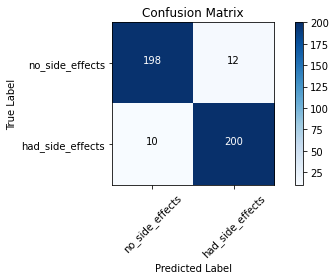

In [23]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_metrics(cm=cm, classes=cm_plot_labels, title="Confusion Matrix")

### Saving and Loading a model

#### 1. `model.save()`

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [28]:
import os.path
if os.path.isfile("YOUR_PATH/filename.h5") is False:
   # Check if the file exists
   model.save("YOUR_PATH/filename.h5")


This functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of model.
- The training configuration (loss, optimizer)
- The state of the optimizer, allowing to resume training exactly where you left off

In [29]:
# To upload the model
from tensorflow.keras.models import load_model
new_model = load_model("YOUR_PATH/filename.h5")

In [30]:
new_model.summary() # To get the summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [31]:
new_model.get_weights() # Get the weights

[array([[-0.16887549,  0.56562936, -0.31092814, -0.06263667,  0.79218084,
          0.54503626, -0.19529083, -0.2656464 ,  0.2989006 , -0.20445746,
         -0.15659714,  0.34985623,  0.33470348, -0.3457005 ,  0.5401763 ,
         -0.34599695]], dtype=float32),
 array([ 0.        , -0.19353163,  0.        ,  0.        , -0.1790541 ,
        -0.17761119,  0.        ,  0.        , -0.13120474,  0.        ,
         0.        ,  0.21179007, -0.14233553,  0.        ,  0.08654835,
         0.        ], dtype=float32),
 array([[ 3.48801315e-02,  9.91058648e-02,  2.88948506e-01,
          2.26613134e-01,  3.40220064e-01,  3.70348692e-02,
         -1.47857964e-01, -1.86778978e-01, -2.01327056e-01,
         -8.61668587e-02,  1.66572958e-01,  2.64592618e-01,
         -3.12931567e-01, -2.71055907e-01,  9.76985991e-02,
         -1.07525125e-01,  3.64688337e-02, -2.07923725e-01,
          3.36496562e-01,  1.16546154e-01, -1.54706657e-01,
          4.77853417e-03, -1.03940949e-01,  3.09468478e-01,
 

In [32]:
new_model.optimizer # To check the optimizer

#### 2. `model.to_json()`

If you only need to save the architecture of a model, and not its weight or its training configuration, you can use the following function to save the architecture only.

In [33]:
json_string = model.to_json()  # Saves as json
# save as YAML
# yaml_string = model.to_yaml()

In [36]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [38]:
# Model reconstruction from JSON
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# To do the same with YAML
# Replace json with yaml

model_architecture.summary()

# we have only the architecture
# we would have to retrain the model to update the weights

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. `model.save_weights()`

If you only need to save the weights of a model, you can use the following function to save the weights only

In [39]:
if os.path.isfile("YOUR_PATH/weights.h5") is False:
  model.save_weights('YOUR_PATH/weights.h5')

In [43]:
# if we saved the weights and if we didn't save the model
# Then we have create the exact architecture once again
model2 = Sequential([
            Dense(units=16, input_shape=(1,), activation='relu'),
            Dense(units=32, activation='relu'),
            Dense(units=2, activation='softmax')
])

# Loading the wieghts backs
model2.load_weights("YOUR_PATH/weights.h5")
# model2.get_weights()  